# Portfolio Part 04

# Heart Stroke Dataset

Name: MD AZIZUL HOQUE ID: 46769579

## Purpose of choosing DATASET

More than half a billion people around the world continue to be affected by cardiovascular diseases, which accounted for 20.5 million deaths in 2021 according to World Heart Report 2023. Australian Bureau of Statistics 2018 demonstrated that Heart disease kills one Australian every 28 minutes.Stroke is one of Australia’s biggest killers says Australian Institute of Health and Welfare. It kills more women than breast cancer and more men than prostate cancer. More than 445,087 Australians are living with the effects of stroke. and were 27,428 Australians who experienced stroke for the first time in their lives in 2020, which equates to one stroke every 19 minutes according to Deloitte Access Economics heart stroke 2020. Researcher's say 80 percent of the strokes can be prevented if necessary actions are taken in time. Therefore, I choose to work on a dataset related to stroke. In this portfolio my prime agenda is to clean and preprocess data and implement classification, Regression and Clustering techniques and building models which can predict whether a patient is likely to get stroke or not based on the given parameters.

## Description of Dataset
This dataset is taken from kaggle. **Source of the data** :https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data1 .
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

### Attribute Information
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not

*Note:'Unknown' in smoking_status means that the information is unavailable for this patient

## Exploring DataSet

In [1]:
#Importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
#Reading csv file
Stroke_data = pd.read_csv('Stroke_data.csv', index_col = 1)
#Displaying first 10 records
Stroke_data.head(10)

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,,,,,,,,,,,
Male,9046,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
Female,51676,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
Male,31112,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
Female,60182,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
Female,1665,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
Male,56669,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
Male,53882,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
Female,10434,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
Female,27419,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1


In [3]:
#Showing last 5 records of the dataset
Stroke_data.tail(5)

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,,,,,,,,,,,
Female,18234,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
Female,44873,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
Female,19723,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
Male,37544,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
Female,44679,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


We can see that this dataset has gender as index. But gender is an essential feature so we are setting id as it has no significant value for our portfolio analysis now. So, I am setting id as index. 

In [4]:
#setting id as index
#Stroke_data.reset_index('id',drop=True)

In [5]:
Stroke_data.head(5)

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,,,,,,,,,,,
Male,9046,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
Female,51676,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
Male,31112,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
Female,60182,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
Female,1665,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
# Size of the dataset
print(len(Stroke_data))

5110


In [7]:
#Number of Records and Columns
Stroke_data.shape

(5110, 11)

In [8]:
#Looking at the statistical summary of the dataframe
Stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
#checking data types of the columns
Stroke_data.dtypes

id                     int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [10]:
#Using info method to see data in more details
Stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, Male to Female
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 479.1+ KB


In [11]:
#Displaying column heading
Stroke_data.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

<Axes: xlabel='heart_disease', ylabel='count'>

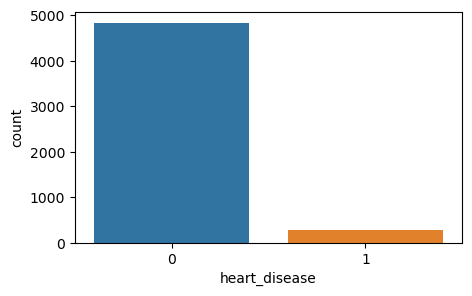

In [12]:
#visualization of data
plt.figure(figsize=(5,3))
sns.countplot(Stroke_data, x="heart_disease")

<Axes: xlabel='stroke', ylabel='count'>

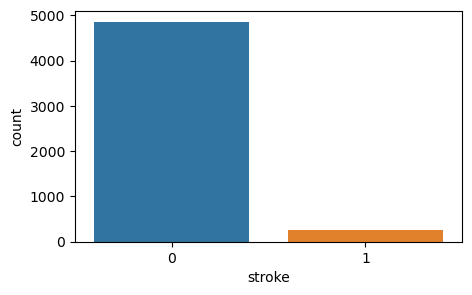

In [13]:
#visualization of data
plt.figure(figsize=(5,3))
sns.countplot(Stroke_data, x="stroke")

<Axes: xlabel='Residence_type', ylabel='count'>

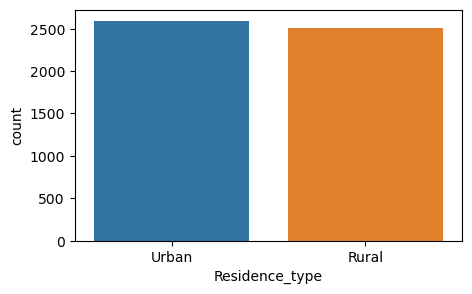

In [14]:
#visualization of data
plt.figure(figsize=(5,3))
sns.countplot(Stroke_data, x="Residence_type")

<Axes: xlabel='smoking_status', ylabel='count'>

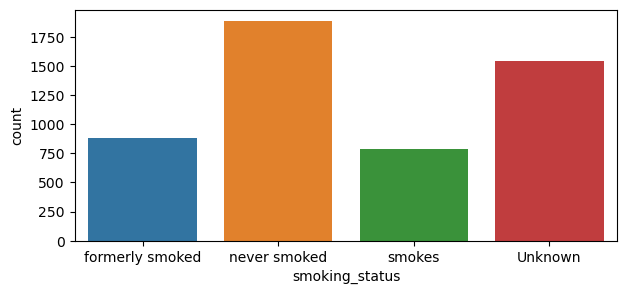

In [15]:
#visualization of data
plt.figure(figsize=(7,3))
sns.countplot(Stroke_data, x="smoking_status")

## Data Processing

### Missing value handling

In [16]:
#checking for null values
Stroke_data.isna().sum()

id                     0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

We can see that 201 bmi field is empty/0. As bmi can not be 0 value as we know every individuals has a bmi we will remove this value just simply dropping the records.

In [17]:
#Before droping dataset size
print(len(Stroke_data))

5110


In [18]:
#Dropping records which has null values in bmi columns
dropped_Null_bmi = Stroke_data.dropna()

In [19]:
#Size of Dataset after dropping
print(len(dropped_Null_bmi))

4909


As mentioned in the description of the dataset that values named as Unknown in smoking_status column are unavailable. We know that smoking status is a crucial factor when it come to heart diseases. So, we will also remove these records which have smoking_status unknown.

In [20]:
Stroke = dropped_Null_bmi[dropped_Null_bmi['smoking_status']!="Unknown"]

In [21]:
# Size of the dataset after removing Unknown smoking status value
print(len(Stroke))

3426


### Outliers

In [22]:
#Creating a dataframe of numerical values to check for outliers
outliers = Stroke.drop([ 'id', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'smoking_status', 'stroke'], axis=True)

In [23]:
outliers

,age,avg_glucose_level,bmi
gender,,,
Male,67.0,228.69,36.6
Male,80.0,105.92,32.5
Female,49.0,171.23,34.4
Female,79.0,174.12,24.0
Male,81.0,186.21,29.0
...,...,...,...
Male,82.0,71.97,28.3
Female,57.0,77.93,21.7
Female,81.0,125.20,40.0


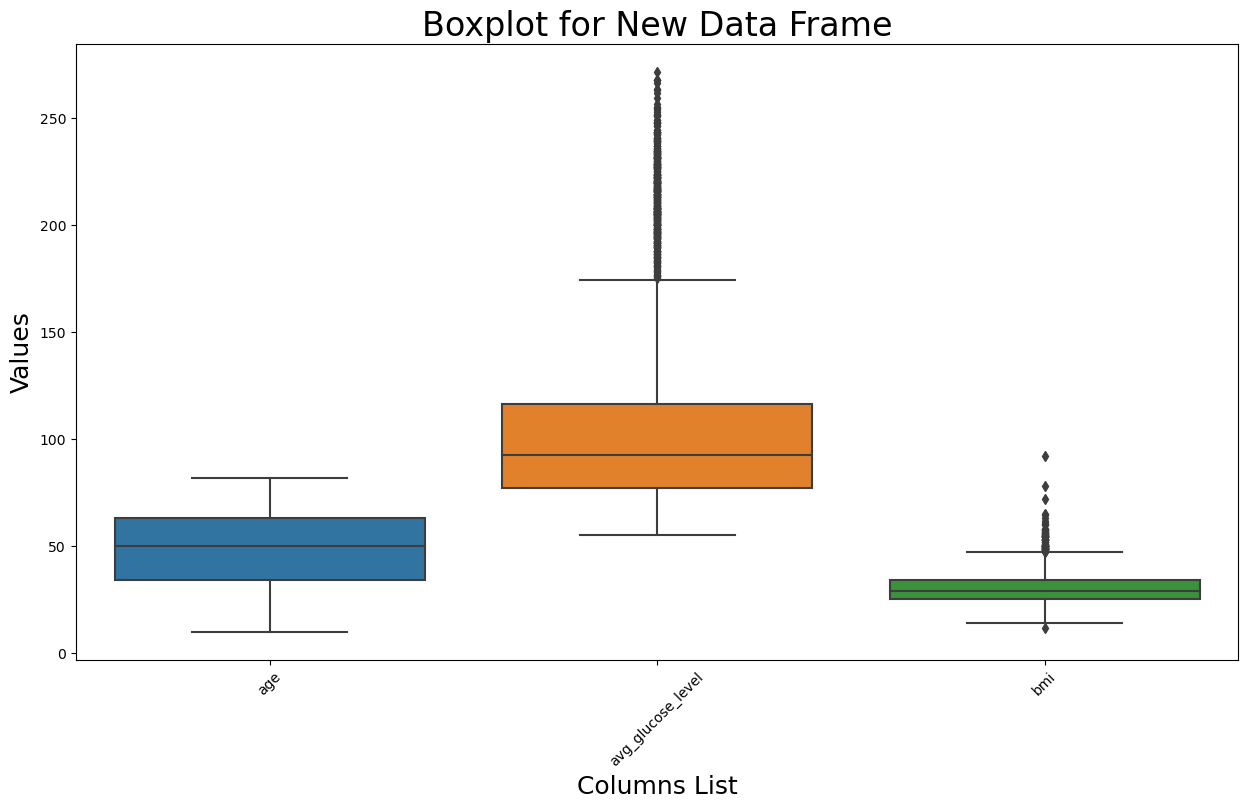

In [24]:
#Boxplot to see Outliers
plt.figure(figsize = (15, 8))
plt.xlabel('Columns List', size = 18)
plt.ylabel('Values', size = 18)
plt.title('Boxplot for New Data Frame', size = 24)
plt.xticks(rotation = 45)

sns.boxplot(data = outliers)
plt.show()

**As we can clearly seen from the boxplot above that 2 features avg_glucose_level and bmi have outliers. Now, we will apply Inter quantile range(IQR) method to remove outliers.**

### IQR method

In [25]:
#deteriming q1, q3 and iqr
q1 = Stroke['avg_glucose_level'].quantile(0.25)
q3 = Stroke['avg_glucose_level'].quantile(0.75)
iqr = q3 - q1

In [26]:
#Displaying q1, q3 and iqr
q1, q3, iqr

(77.23750000000001, 116.2075, 38.969999999999985)

In [27]:
#finding limits
upper_limit = q3 + (1.5 *  iqr)
lower_limit = q1 - (1.5 *  iqr)
lower_limit , upper_limit

(18.782500000000034, 174.66249999999997)

<Axes: >

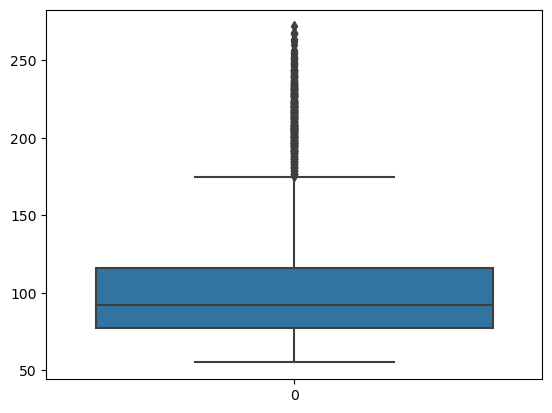

In [28]:
#boxplot of avg_glucose_level feature before removing outliers
sns.boxplot(Stroke['avg_glucose_level'])

In [29]:
#finding the outliers
Stroke.loc[(Stroke['avg_glucose_level'] > upper_limit) | (Stroke['avg_glucose_level'] < lower_limit)]

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,,,,,,,,,,,
Male,9046,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
Male,56669,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
Female,5317,79.0,0,1,Yes,Private,Urban,214.09,28.2,never smoked,1
Male,56112,64.0,0,1,Yes,Private,Urban,191.61,37.5,smokes,1
Male,34120,75.0,1,0,Yes,Private,Urban,221.29,25.8,smokes,1
...,...,...,...,...,...,...,...,...,...,...,...
Female,65405,79.0,0,0,No,Private,Urban,253.86,28.8,formerly smoked,0
Female,49773,78.0,0,0,Yes,Private,Urban,203.36,28.7,formerly smoked,0
Male,44878,53.0,0,0,Yes,Private,Rural,175.92,26.9,smokes,0


In [30]:
#triming outlier data
clean_df = Stroke.loc[(Stroke['avg_glucose_level'] < upper_limit) & (Stroke['avg_glucose_level'] > lower_limit)]

In [31]:
len(clean_df)

2961

In [32]:
#Displaying length of dataset before and after removing outliers
print('Before removing :', len(Stroke))
print('After removing :', len(clean_df))
print('Number of Outliers :', len(Stroke)-len(clean_df))

Before removing : 3426
After removing : 2961
Number of Outliers : 465


<Axes: >

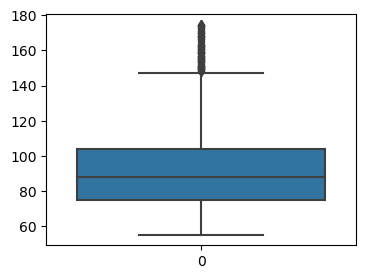

In [33]:
#Displaying boxplot after removal of outliers
plt.figure(figsize = (4, 3))
sns.boxplot(clean_df['avg_glucose_level'])

In [34]:
len(clean_df)

2961

In [35]:
clean_df

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,,,,,,,,,,,
Male,31112,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
Female,60182,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
Female,1665,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
Male,53882,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
Female,10434,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
Male,68398,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
Female,45010,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
Female,44873,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0


<Axes: >

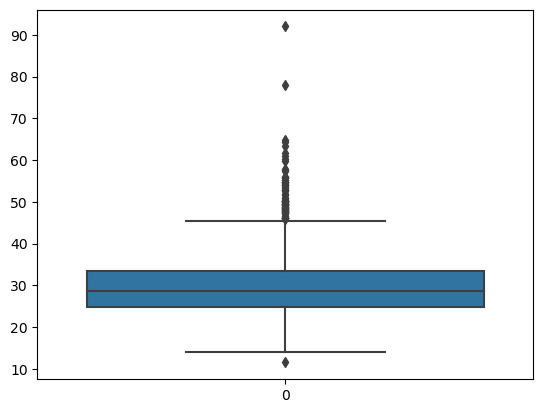

In [36]:
sns.boxplot(clean_df['bmi'])

In [37]:
q1 = clean_df['bmi'].quantile(0.25)
q3 = clean_df['bmi'].quantile(0.75)
iqr = q3 - q1

In [38]:
q1, q3, iqr

(24.9, 33.3, 8.399999999999999)

In [39]:
upper_limit = q3 + (1.5 *  iqr)
lower_limit = q1 - (1.5 *  iqr)
lower_limit , upper_limit

(12.3, 45.89999999999999)

In [40]:
#finding the outliers
clean_df.loc[(clean_df['bmi'] > upper_limit) | (clean_df['bmi'] < lower_limit)]

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,,,,,,,,,,,
Female,72911,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0
Female,1703,52.0,0,0,Yes,Private,Urban,82.24,54.7,formerly smoked,0
Female,38805,37.0,0,0,Yes,Private,Rural,75.18,48.2,formerly smoked,0
Male,66333,52.0,0,0,Yes,Self-employed,Urban,78.40,64.8,never smoked,0
Female,9404,44.0,0,0,Yes,Private,Rural,107.41,47.3,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
Female,53323,34.0,0,0,No,Govt_job,Urban,79.60,46.3,never smoked,0
Female,72696,53.0,0,0,Yes,Private,Urban,70.51,54.1,never smoked,0
Female,63656,18.0,0,0,No,Private,Urban,101.95,46.0,formerly smoked,0


In [41]:
#triming outlier data
bmi_clean_df = clean_df.loc[(clean_df['bmi'] < upper_limit) & (clean_df['bmi'] > lower_limit)]

In [42]:
#Length of dataset before and after removing outliers
print('Before removing :', len(clean_df))
print('After removing :', len(bmi_clean_df))
print('Number of Outliers :', len(clean_df)-len(bmi_clean_df))

Before removing : 2961
After removing : 2883
Number of Outliers : 78


<Axes: >

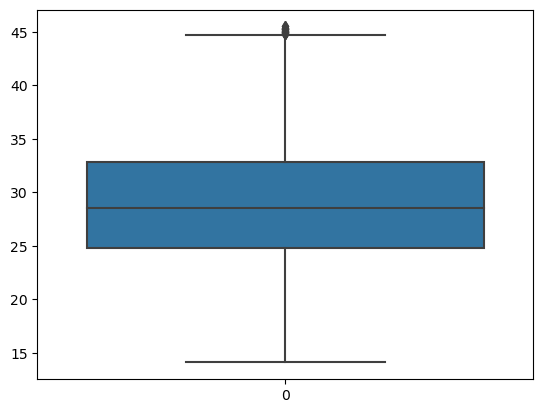

In [43]:
sns.boxplot(bmi_clean_df['bmi'])

In [44]:
#naming the outlier free dataset
clean_ds = bmi_clean_df

### Converting object feature to numerical value

In [45]:
#Displaying categorical features and values
print(clean_ds['ever_married'].unique())
print(clean_ds['work_type'].unique())
print(clean_ds['Residence_type'].unique())
print(clean_ds['smoking_status'].unique())

['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Rural' 'Urban']
['never smoked' 'smokes' 'formerly smoked']


In [46]:
#converting categorical features into numerical values
ord_enc = OrdinalEncoder()
import warnings
warnings.filterwarnings('ignore')

In [47]:
clean_ds['EverMarried'] = ord_enc.fit_transform(clean_ds[['ever_married']])
clean_ds['Job_type'] = ord_enc.fit_transform(clean_ds[['work_type']])
clean_ds['residence_type'] = ord_enc.fit_transform(clean_ds[['Residence_type']])
clean_ds['Smoking_status'] = ord_enc.fit_transform(clean_ds[['smoking_status']])

In [48]:
#Displaying dataset after with both categorical and their numerical feature columns
clean_ds.head()

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,EverMarried,Job_type,residence_type,Smoking_status
gender,,,,,,,,,,,,,,,
Male,31112,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1.0,2.0,0.0,1.0
Female,60182,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1.0,2.0,1.0,2.0
Female,1665,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1.0,3.0,0.0,1.0
Male,53882,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1,1.0,2.0,0.0,1.0
Female,10434,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1,0.0,2.0,1.0,1.0


In [49]:
#removing object columns
stroke_ds = clean_ds.drop(['ever_married', 'Residence_type', 'smoking_status', 'work_type'], axis=1)

In [50]:
#showing dataframe without any object column
stroke_ds.head(10)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,EverMarried,Job_type,residence_type,Smoking_status
gender,,,,,,,,,,,
Male,31112,80.0,0,1,105.92,32.5,1,1.0,2.0,0.0,1.0
Female,60182,49.0,0,0,171.23,34.4,1,1.0,2.0,1.0,2.0
Female,1665,79.0,1,0,174.12,24.0,1,1.0,3.0,0.0,1.0
Male,53882,74.0,1,1,70.09,27.4,1,1.0,2.0,0.0,1.0
Female,10434,69.0,0,0,94.39,22.8,1,0.0,2.0,1.0,1.0
Female,12109,81.0,1,0,80.43,29.7,1,1.0,2.0,0.0,1.0
Female,12095,61.0,0,1,120.46,36.8,1,1.0,0.0,0.0,2.0
Female,12175,54.0,0,0,104.51,27.3,1,1.0,2.0,1.0,2.0
Female,58202,50.0,1,0,167.41,30.9,1,1.0,3.0,0.0,1.0


### Correlation among features

In [51]:
stroke_ds = stroke_ds.drop(columns =['id'])

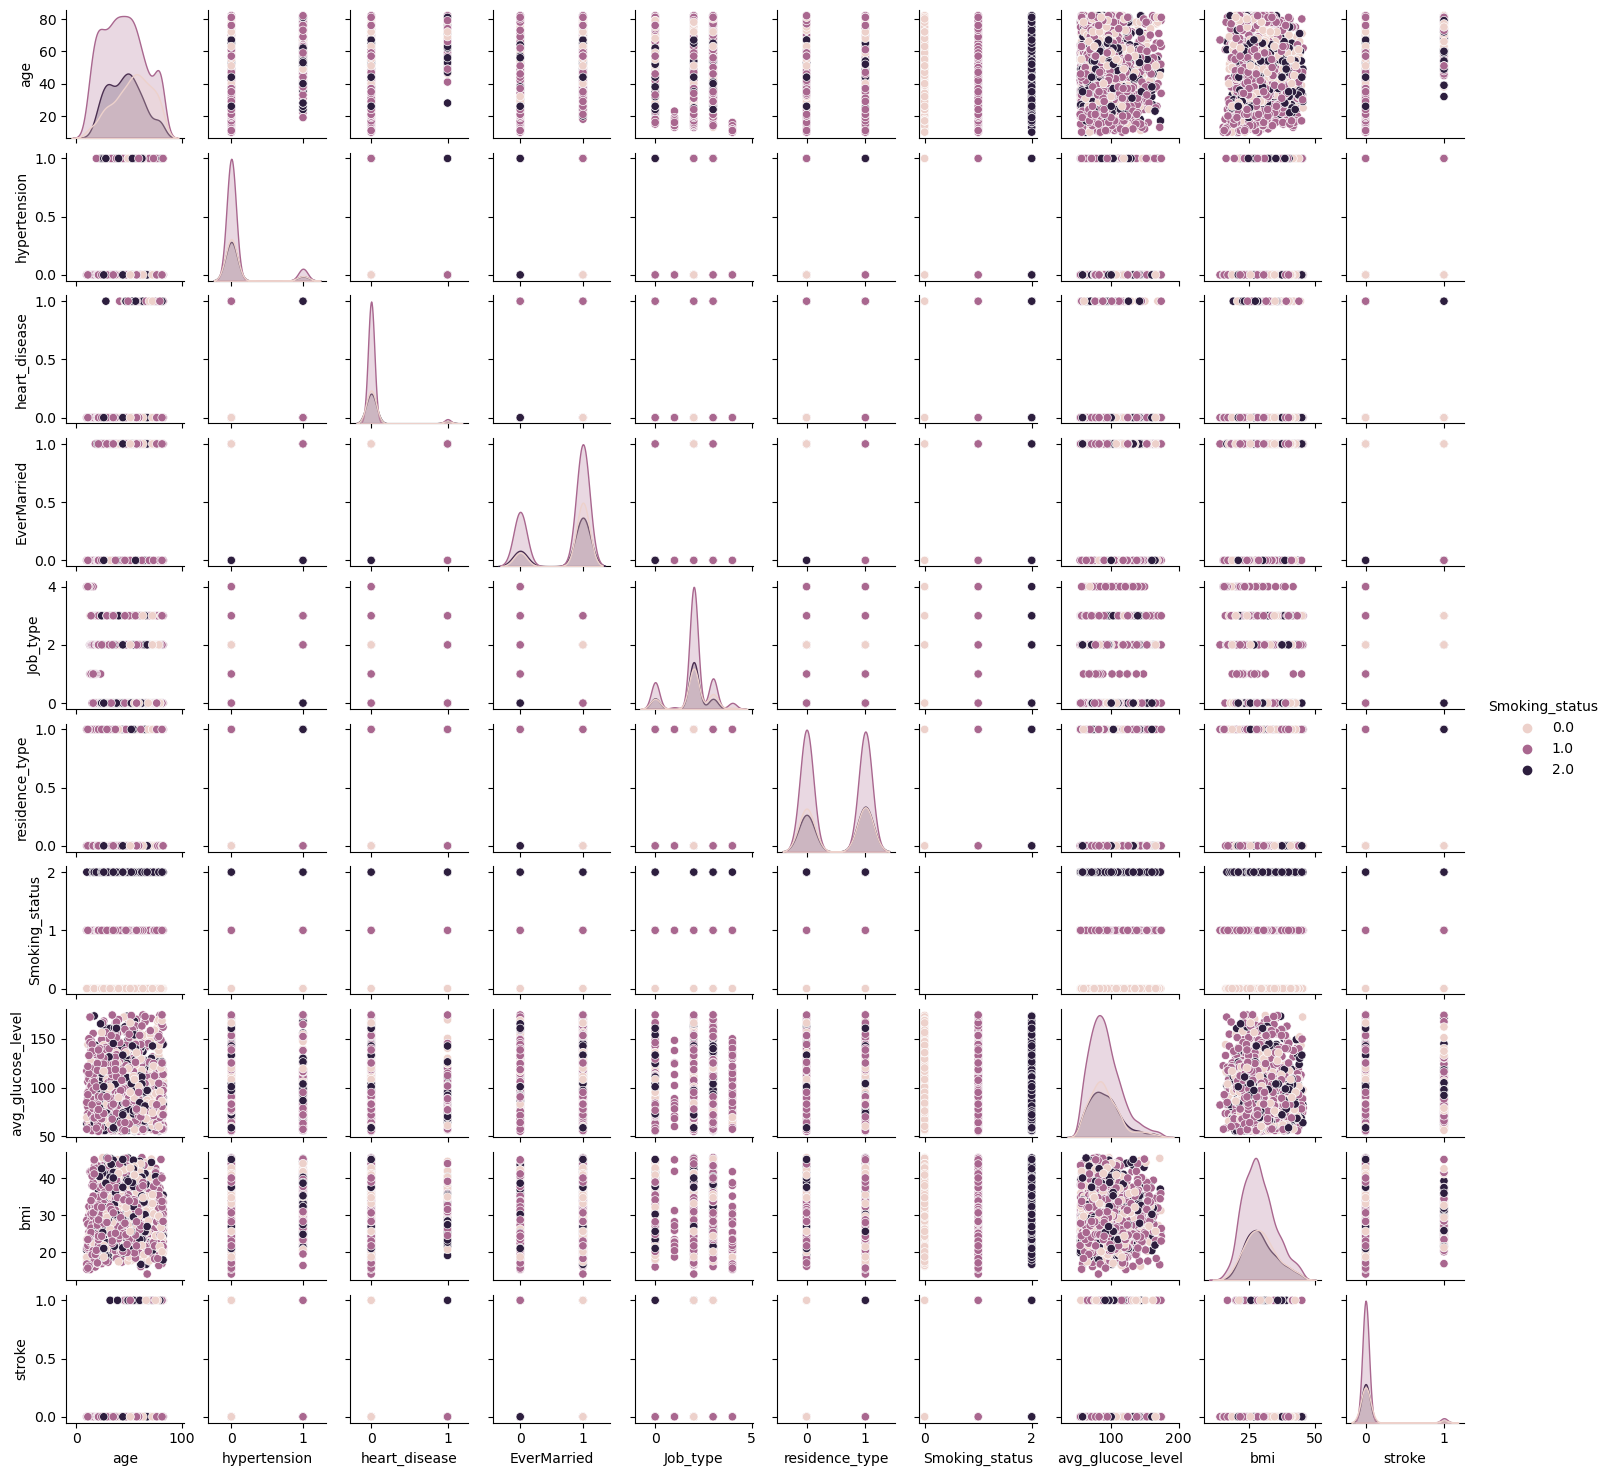

In [52]:
# Visualizing data using pairplot to understand the relationship among features
sns.pairplot(data = stroke_ds, hue = 'Smoking_status',height = 1.5 , diag_kind = 'kde',kind = 'scatter', vars=['age', 'hypertension','heart_disease','EverMarried','Job_type','residence_type','Smoking_status','avg_glucose_level','bmi','stroke'])

In [53]:
#Generating correlation table 
corr_matrix = stroke_ds.corr(numeric_only=True)
corr_matrix

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,EverMarried,Job_type,residence_type,Smoking_status
age,1.000000,0.246950,0.243739,-0.012250,0.101464,0.222229,0.530547,0.000281,0.014882,-0.127834
hypertension,0.246950,1.000000,0.109554,0.014292,0.118830,0.115501,0.103068,0.007839,-0.008006,-0.000589
heart_disease,0.243739,0.109554,1.000000,0.019950,0.015805,0.088945,0.075579,0.003431,-0.001376,0.004433
avg_glucose_level,-0.012250,0.014292,0.019950,1.000000,0.004276,0.015380,0.006084,0.013893,-0.019664,0.015209
bmi,0.101464,0.118830,0.015805,0.004276,1.000000,-0.006151,0.181387,-0.075151,0.016468,-0.003103
stroke,0.222229,0.115501,0.088945,0.015380,-0.006151,1.000000,0.057997,0.037192,-0.000802,-0.024709
EverMarried,0.530547,0.103068,0.075579,0.006084,0.181387,0.057997,1.000000,-0.068899,0.002379,-0.051764
Job_type,0.000281,0.007839,0.003431,0.013893,-0.075151,0.037192,-0.068899,1.000000,-0.001513,-0.041922
residence_type,0.014882,-0.008006,-0.001376,-0.019664,0.016468,-0.000802,0.002379,-0.001513,1.000000,0.027719
Smoking_status,-0.127834,-0.000589,0.004433,0.015209,-0.003103,-0.024709,-0.051764,-0.041922,0.027719,1.000000


<Axes: >

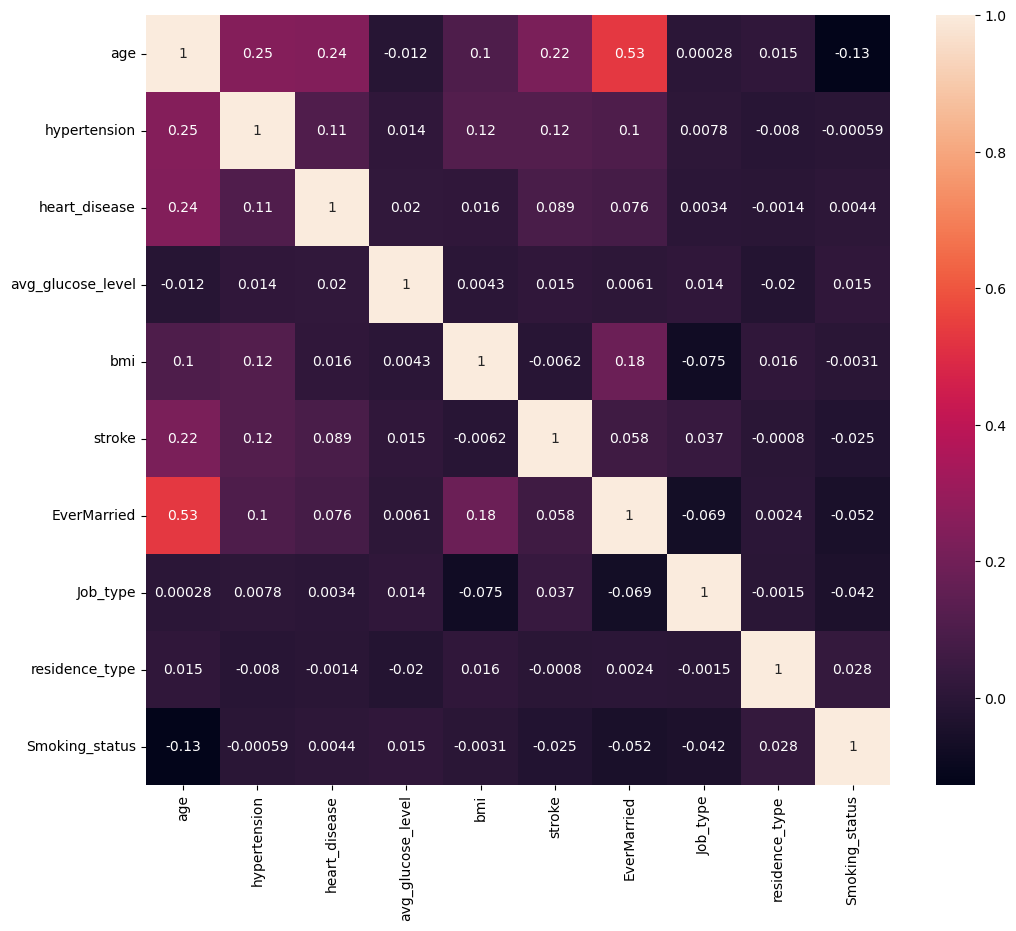

In [54]:
#Generating correlation heatmap to visualize relationship more efficiently
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=False)
#
# Draw the heatmap
#
sns.heatmap(corr_matrix, annot=True)

**Highly Positive Correlations**

0.53 EverMarried vs age 

0.25 hypertension vs age

0.24 heart_disease vs age

**Highly Negative Correlations**

-0.13 Smoking_status vs age

-0.075 Job_type vs bmi

-0.069 Job_type vs EverMarried

**Least Positive Correlations**

0.00028 Job_type vs age

0.0024 residence_type vs EverMarried

0.0034 Job_type vs heart_disease

**Least Negative Correlations**

-0.00059 Smoking_status vs hypertension

-0.0008 residence_type vs stroke

-0.0014 residence_type vs heart_disease

**Correlation In terms of Stroke:**

**Highly Positive :** 0.22 stroke

**Highly Negative :** -0.025 Smoking_status

**Least Positive :** 0.015 avg_glucose_level

**Least Negative :** -0.0008 residence_type

## Linear Regression

### Training and Testing data

### Model 1

#### Split your data into training(80%) and testing data (20%) and use random_state=142

In [55]:
# Split your data into training(80%) and testing data (20%) and use random_state=142
train, test = train_test_split(stroke_ds, test_size=0.2, random_state=142)
#Printing train and test data size
print('Train data size: ',train.shape)
print('Test data size: ',test.shape)

Train data size:  (2306, 10)
Test data size:  (577, 10)


In [56]:
stroke_ds.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'EverMarried', 'Job_type', 'residence_type',
       'Smoking_status'],
      dtype='object')

### based on 2 most correlated features 

In [57]:
#Defining input and Output feature
X_train = train[['age', 'hypertension']]
y_train = train['stroke']

X_test = test[['age', 'hypertension']]
y_test = test['stroke']

In [58]:
#Size of X_train, y_train, X_test, y_test
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2306, 2), (2306,), (577, 2), (577,))

In [59]:
# Build the model
reg = linear_model.LinearRegression()

In [60]:
#Train the model
reg.fit(X_train, y_train)

LinearRegression()

In [61]:
#predict for test data
predicted = reg.predict(X_test)

In [62]:
#Evaluating model
m1_mse = ((np.array(y_test) - predicted)**2).sum()/len(y_test)
m1_rmse = np.sqrt(m1_mse)
m1_r2 = r2_score(y_test, predicted)
print("MSE :", m1_mse)
print("RMSE :" , m1_rmse)
print("R Squared :", m1_r2)
# Calculate MAE
m1_mae = mean_absolute_error(y_test, predicted)
print("Mean Absolute Error:", m1_mae)

MSE : 0.03913380341392188
RMSE : 0.19782265647271516
R Squared : 0.055885649507710355
Mean Absolute Error: 0.0847181148189077


### Model 2

#### Split your data into training(20%) and testing data (80%) and use random_state=142

In [63]:
train, test = train_test_split(stroke_ds, test_size=0.8, random_state=142)
#Printing train and test data size
print('Train data size: ',train.shape)
print('Test data size: ',test.shape)

Train data size:  (576, 10)
Test data size:  (2307, 10)


In [64]:
#Defining input and Output feature
X_train = train[['age', 'hypertension']]
y_train = train['stroke']

X_test = test[['age', 'hypertension']]
y_test = test['stroke']

In [65]:
#Size of X_train, y_train, X_test, y_test
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((576, 2), (576,), (2307, 2), (2307,))

In [66]:
# Build the model
reg = linear_model.LinearRegression()

In [67]:
#Train the model
reg.fit(X_train, y_train)

LinearRegression()

In [68]:
#predict for test data
predicted = reg.predict(X_test)

In [69]:
#Evaluating model
m2_mse = ((np.array(y_test) - predicted)**2).sum()/len(y_test)
m2_rmse = np.sqrt(m2_mse)
m2_r2 = r2_score(y_test, predicted)
print("MSE :", m2_mse)
print("RMSE :" , m2_rmse)
print("R Squared :", m2_r2)
# Calculate MAE
m2_mae = mean_absolute_error(y_test, predicted)
print("Mean Absolute Error:", m2_mae)

MSE : 0.03511847890296861
RMSE : 0.18739925000641974
R Squared : 0.04282595957000601
Mean Absolute Error: 0.08901167588865079


### Model 3

### Split your data into training(90%) and testing data (10%) and use random_state=142

In [70]:
#Spliting the dataset into train and test 
train, test = train_test_split(stroke_ds, test_size=0.1, random_state=142)
#Printing train and test data size
print('Train data size: ',train.shape)
print('Test data size: ',test.shape)

Train data size:  (2594, 10)
Test data size:  (289, 10)


In [71]:
#Defining input and Output feature
X_train = train[['age', 'hypertension']]
y_train = train['stroke']

X_test = test[['age', 'hypertension']]
y_test = test['stroke']

In [72]:
#Size of X_train, y_train, X_test, y_test
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2594, 2), (2594,), (289, 2), (289,))

In [73]:
# Build the model
reg = linear_model.LinearRegression()

In [74]:
#Train the model
reg.fit(X_train, y_train)

LinearRegression()

In [75]:
#predict for test data
predicted = reg.predict(X_test)

In [76]:
#Evaluating model
m3_mse = ((np.array(y_test) - predicted)**2).sum()/len(y_test)
m3_rmse = np.sqrt(m3_mse)
m3_r2 = r2_score(y_test, predicted)
print("MSE :", m3_mse)
print("RMSE :" , m3_rmse)
print("R Squared :", m3_r2)
# Calculate MAE
m3_mae = mean_absolute_error(y_test, predicted)
print("Mean Absolute Error:", m3_mae)

MSE : 0.03886708792395275
RMSE : 0.19714737615284852
R Squared : 0.023400105145469974
Mean Absolute Error: 0.08514341520247828


### Model 4

### Split your data into training(10%) and testing data (90%) and use random_state=142

In [77]:
#Spliting the dataset into train and test 
train, test = train_test_split(stroke_ds, test_size=0.9, random_state=142)
#Printing train and test data size
print('Train data size: ',train.shape)
print('Test data size: ',test.shape)

Train data size:  (288, 10)
Test data size:  (2595, 10)


In [78]:
#Defining input and Output feature
X_train = train[['age', 'hypertension']]
y_train = train['stroke']

X_test = test[['age', 'hypertension']]
y_test = test['stroke']

In [79]:
#Size of X_train, y_train, X_test, y_test
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((288, 2), (288,), (2595, 2), (2595,))

In [80]:
# Build the model
reg = linear_model.LinearRegression()

In [81]:
#Train the model
reg.fit(X_train, y_train)

LinearRegression()

In [82]:
#predict for test data
predicted = reg.predict(X_test)

In [83]:
#Evaluating model
m4_mse = ((np.array(y_test) - predicted)**2).sum()/len(y_test)
m4_rmse = np.sqrt(m4_mse)
m4_r2 = r2_score(y_test, predicted)
print("MSE :", m4_mse)
print("RMSE :" , m4_rmse)
print("R Squared :", m4_r2)
# Calculate MAE
m4_mae = mean_absolute_error(y_test, predicted)
print("Mean Absolute Error:", m4_mae)

MSE : 0.03745284849015844
RMSE : 0.19352738434174746
R Squared : 0.04406400216067996
Mean Absolute Error: 0.07531868763911251


In [84]:
# initialize data of lists. 
data = {'Model 1': [m1_mse, m1_rmse, m1_r2, m1_mae], 
        'Model 2': [m2_mse, m2_rmse, m2_r2, m2_mae],
        'Model 3': [m3_mse, m3_rmse, m3_r2, m3_mae],
        'Model 4': [m4_mse, m4_rmse, m4_r2, m4_mae]} 
  
# Creates pandas DataFrame. 
df = pd.DataFrame(data, index=['MSE', 
                               'RMSE', 
                               'R2 Squared', 
                               'MAE']) 
  
# printing dataframe of 4 Linear Regression model with 2 most correlated feature
df 

,Model 1,Model 2,Model 3,Model 4
MSE,0.039134,0.035118,0.038867,0.037453
RMSE,0.197823,0.187399,0.197147,0.193527
R2 Squared,0.055886,0.042826,0.023400,0.044064
MAE,0.084718,0.089012,0.085143,0.075319


From the above linear regression model dataframe we can say that Model 4 works better than other three models based on MSE, RMSE, R2 squared and MAE value .

### Linear Regression model based on multiple features

In [85]:
#Spliting the dataset into train and test 
train, test = train_test_split(stroke_ds, test_size=0.2, random_state=142)
#Printing train and test data size
print('Train data size: ',train.shape)
print('Test data size: ',test.shape)

Train data size:  (2306, 10)
Test data size:  (577, 10)


In [86]:
#Defining input and Output feature
X_train = train[['age', 'hypertension','heart_disease','EverMarried','Job_type']]
y_train = train['stroke']

X_test = test[['age', 'hypertension','heart_disease','EverMarried','Job_type']]
y_test = test['stroke']

In [87]:
#Size of X_train, y_train, X_test, y_test
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2306, 5), (2306,), (577, 5), (577,))

In [88]:
# Build the model
reg = linear_model.LinearRegression()

In [89]:
#Train the model
reg.fit(X_train, y_train)

LinearRegression()

In [90]:
#predict for test data
predicted = reg.predict(X_test)

In [91]:
#Evaluating model
m_mse = ((np.array(y_test) - predicted)**2).sum()/len(y_test)
m_rmse = np.sqrt(m_mse)
m_r2 = r2_score(y_test, predicted)
print("MSE :", m_mse)
print("RMSE :" , m_rmse)
print("R Squared :", m_r2)

# Calculate MAE
m_mae = mean_absolute_error(y_test, predicted)
print("Mean Absolute Error:", m_mae)

MSE : 0.038775627724476056
RMSE : 0.19691528057638405
R Squared : 0.06452674183463114
Mean Absolute Error: 0.08256917013316874


In [92]:
#Evaluating both model in a dataframe
# initialize data of lists. 
data = {'MSE': [m4_mse, m_mse], 
        'RMSE': [m4_rmse, m_rmse],
        'R Squared': [m4_r2, m_r2],
        'MAE': [m4_mae, m_mae]} 
  
# Creating DataFrame 
df = pd.DataFrame(data, index=['Two Feature', 
                               'Multiple Feature']) 
  
# Printing the output. 
df 

,MSE,RMSE,R Squared,MAE
Two Feature,0.037453,0.193527,0.044064,0.075319
Multiple Feature,0.038776,0.196915,0.064527,0.082569


As per the above table data from the built in models we can see that multiple features model work more accurately compare to two features model.

### Logistic Regression

In [93]:
#Spliting the dataset
train, test = train_test_split(stroke_ds, test_size=0.2, random_state=142)
#Printing train and test data size
print('Train data size: ',train.shape)
print('Test data size: ',test.shape)

Train data size:  (2306, 10)
Test data size:  (577, 10)


In [94]:
#Defining input and Output feature
X_train = train.drop(['stroke'], axis = 1)
y_train = train['stroke']

X_test = test.drop(['stroke'], axis = 1)
y_test = test['stroke']

In [95]:
#Size of X_train, y_train, X_test, y_test
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2306, 9), (2306,), (577, 9), (577,))

In [96]:
#importing roc_curve and roc_auc_score from sklearn library
from sklearn.metrics import roc_curve, roc_auc_score

In [97]:
# Build the Logistic Regression model
model = linear_model.LogisticRegression()
#train model
model.fit(X_train, y_train)

LogisticRegression()

In [98]:
# Do predictions on test set
pred_test = model.predict(X_test)

In [99]:
# Evaluate the performance of your trained model
#Calculating accuracy score
accuracy = accuracy_score(y_test, pred_test)
print('Accuracy of test data is : ',accuracy)

Accuracy of test data is :  0.9566724436741768


In [100]:
#Calculating and printing confusion matrix
print('confusion matrix: \n', confusion_matrix(y_test, pred_test))

confusion matrix: 
 [[552   0]
 [ 25   0]]


In [101]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred_test)


In [102]:
# Calculate AUC
auc = roc_auc_score(y_test, pred_test)


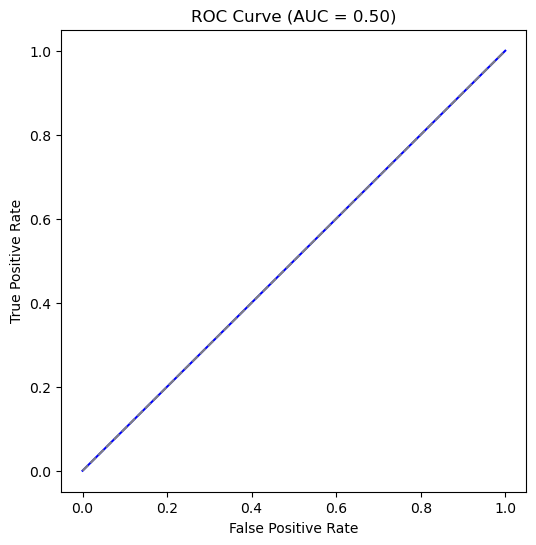

AUC: 0.50


In [103]:
# Plot the ROC curve (optional)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='b')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC = {auc:.2f})')
plt.show()

print(f'AUC: {auc:.2f}')


### Feature Selection
### Recursive Feature Estimation(RFE)

In [104]:
#Build the RFE model
rfe_model = linear_model.LogisticRegression()

In [105]:
#Adjusting number of features
rfe = RFE(estimator= rfe_model, n_features_to_select= 3, step = 1)

In [106]:
#train the model
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=3)

In [107]:
#shows which feature rfe selects
rfe.support_

array([False,  True,  True, False, False,  True, False, False, False])

In [108]:
#Displays ranking of features
rfe.ranking_

array([4, 1, 1, 7, 6, 1, 5, 3, 2])

In [109]:
#Doing prediction on the test
predicted_rfe = rfe.predict(X_test)

In [110]:
#Calculating accuracy score using method
rfe_accuracy = accuracy_score(y_test, predicted_rfe)

In [111]:
#Printing accuracy score
print('The accuracy is: ', rfe_accuracy)

The accuracy is:  0.9566724436741768


In [112]:
#Calculating and printing confusion matrix
print('RFE confusion matrix: \n', confusion_matrix(y_test, predicted_rfe))

RFE confusion matrix: 
 [[552   0]
 [ 25   0]]


In [113]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_rfe)

In [114]:
# Calculate AUC
auc = roc_auc_score(y_test, predicted_rfe)
print('AUC :', auc)

AUC : 0.5


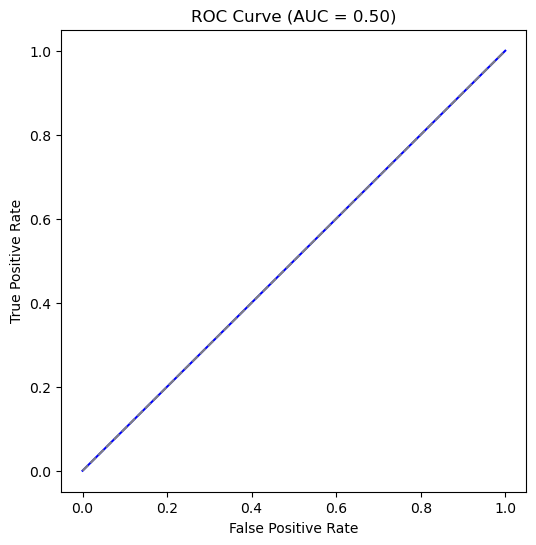

AUC: 0.50


In [115]:
# Plot the ROC curve (optional)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='b')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC = {auc:.2f})')
plt.show()

print(f'AUC: {auc:.2f}')

Logistic Regression gives accuracy of 0.9566724436741768. We used rfe model which also gives us the same result.

### KMeans clustering method

In [116]:
#Displaying columns of the dataset
stroke_ds.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'EverMarried', 'Job_type', 'residence_type',
       'Smoking_status'],
      dtype='object')

In [117]:
#changing dataset variable name
Stroke_cluster= stroke_ds

In [118]:
#Build the model
km = KMeans(n_clusters = 2)

In [119]:
# Train the model
km.fit(Stroke_cluster)

KMeans(n_clusters=2)

In [120]:
#predict the value
Stroke_cluster['label'] = km.predict(Stroke_cluster)

In [121]:
Stroke_cluster.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,EverMarried,Job_type,residence_type,Smoking_status,label
gender,,,,,,,,,,,
Male,80.0,0,1,105.92,32.5,1,1.0,2.0,0.0,1.0,0
Female,49.0,0,0,171.23,34.4,1,1.0,2.0,1.0,2.0,0
Female,79.0,1,0,174.12,24.0,1,1.0,3.0,0.0,1.0,0
Male,74.0,1,1,70.09,27.4,1,1.0,2.0,0.0,1.0,1
Female,69.0,0,0,94.39,22.8,1,0.0,2.0,1.0,1.0,1


In [122]:
# mean value for each column by cluster
Stroke_cluster_mean = Stroke_cluster.groupby('label').agg('mean')
Stroke_cluster_mean

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,EverMarried,Job_type,residence_type,Smoking_status
label,,,,,,,,,,
0,46.200669,0.095875,0.055741,119.679877,29.055630,0.043478,0.733556,1.929766,0.489409,1.016722
1,47.120342,0.093152,0.042296,79.258776,29.217825,0.038771,0.739174,1.913394,0.520141,0.972810


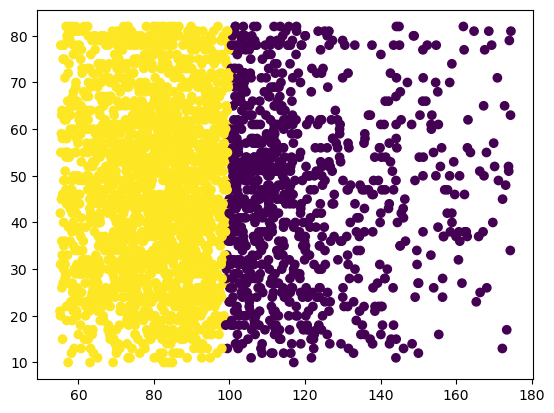

In [123]:
#Scatter plot 
plt.scatter(Stroke_cluster['avg_glucose_level'], Stroke_cluster['age'], c=Stroke_cluster['label'])

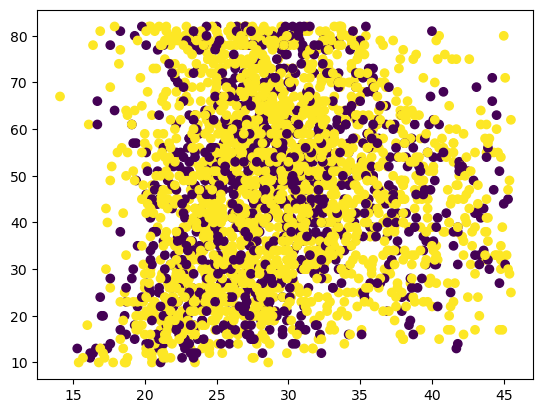

In [124]:
plt.scatter(Stroke_cluster['bmi'], Stroke_cluster['age'], c=Stroke_cluster['label'])

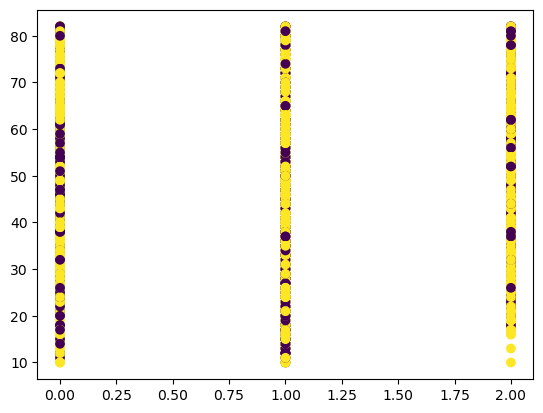

In [125]:
plt.scatter(Stroke_cluster['Smoking_status'], Stroke_cluster['age'], c=Stroke_cluster['label'])

### KMeans cluster using k value 3

In [126]:
#Build the model
km = KMeans(n_clusters = 3)

In [127]:
# Train the model
km.fit(Stroke_cluster)

KMeans(n_clusters=3)

In [128]:
#predict the value
Stroke_cluster['label'] = km.predict(Stroke_cluster)

In [129]:
Stroke_cluster.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,EverMarried,Job_type,residence_type,Smoking_status,label
gender,,,,,,,,,,,
Male,80.0,0,1,105.92,32.5,1,1.0,2.0,0.0,1.0,2
Female,49.0,0,0,171.23,34.4,1,1.0,2.0,1.0,2.0,0
Female,79.0,1,0,174.12,24.0,1,1.0,3.0,0.0,1.0,0
Male,74.0,1,1,70.09,27.4,1,1.0,2.0,0.0,1.0,2
Female,69.0,0,0,94.39,22.8,1,0.0,2.0,1.0,1.0,2


In [130]:
# mean value for each column by cluster
Stroke_cluster_mean = Stroke_cluster.groupby('label').agg('mean')
Stroke_cluster_mean

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,EverMarried,Job_type,residence_type,Smoking_status
label,,,,,,,,,,
0,45.376682,0.094170,0.049327,125.175516,29.320927,0.043348,0.742900,1.914798,0.496263,1.017937
1,31.028829,0.027928,0.001802,81.183739,28.634685,0.007207,0.554955,1.905405,0.512613,1.063063
2,63.608696,0.160326,0.089674,82.340951,29.609873,0.071558,0.917572,1.933877,0.517210,0.890399


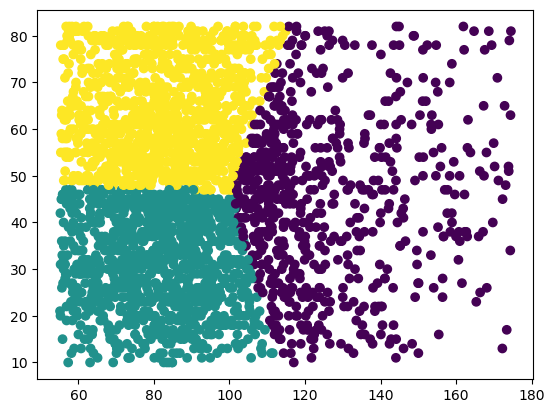

In [131]:
#Scatter plot 
plt.scatter(Stroke_cluster['avg_glucose_level'], Stroke_cluster['age'], c=Stroke_cluster['label'])

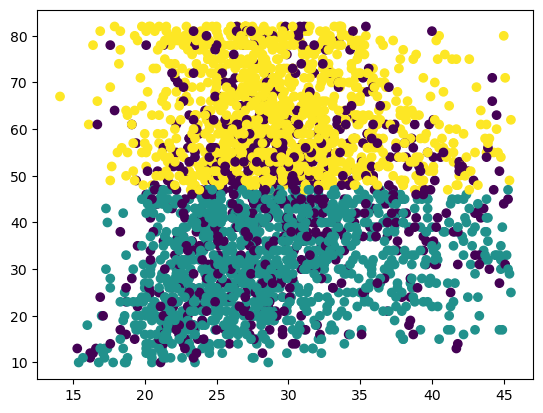

In [132]:
plt.scatter(Stroke_cluster['bmi'], Stroke_cluster['age'], c=Stroke_cluster['label'])

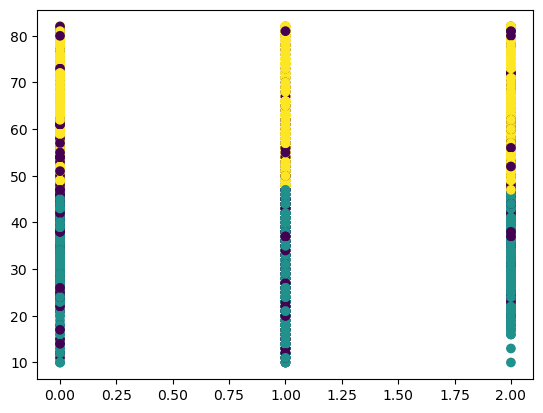

In [133]:
plt.scatter(Stroke_cluster['Smoking_status'], Stroke_cluster['age'], c=Stroke_cluster['label'])

### Hierarchical Clustering

In [134]:
dist = pdist(Stroke_cluster, 'euclidean')
linkage_matrix =linkage(dist, method = 'complete')

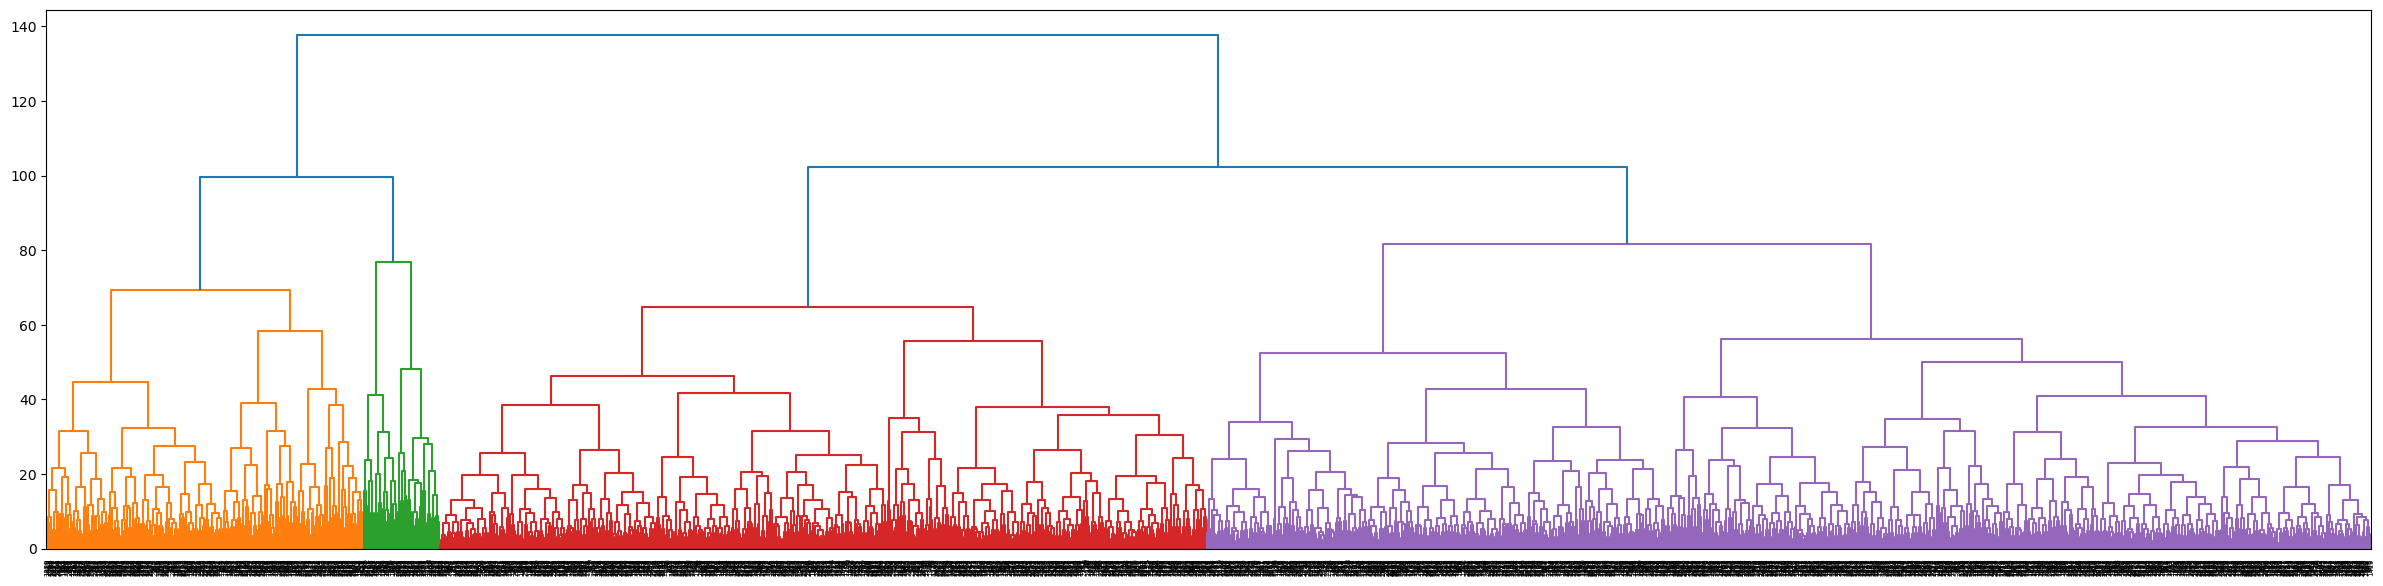

In [135]:
plt.figure(figsize =(30, 7))
dendrogram(linkage_matrix)
plt.show()

In [136]:
labels = cut_tree(linkage_matrix, n_clusters = 3)
Stroke_cluster['label'] = labels

In [137]:
Stroke_cluster

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,EverMarried,Job_type,residence_type,Smoking_status,label
gender,,,,,,,,,,,
Male,80.0,0,1,105.92,32.5,1,1.0,2.0,0.0,1.0,0
Female,49.0,0,0,171.23,34.4,1,1.0,2.0,1.0,2.0,1
Female,79.0,1,0,174.12,24.0,1,1.0,3.0,0.0,1.0,1
Male,74.0,1,1,70.09,27.4,1,1.0,2.0,0.0,1.0,2
Female,69.0,0,0,94.39,22.8,1,0.0,2.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
Male,82.0,1,0,71.97,28.3,0,1.0,3.0,0.0,1.0,2
Female,57.0,0,0,77.93,21.7,0,1.0,2.0,0.0,1.0,0
Female,81.0,0,0,125.20,40.0,0,1.0,3.0,1.0,1.0,0


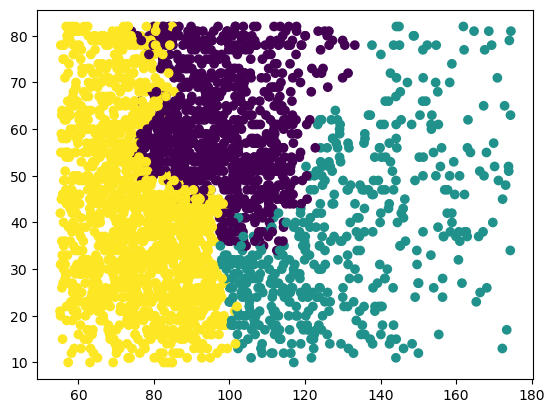

In [138]:
#Scatter plot 
plt.scatter(Stroke_cluster['avg_glucose_level'], Stroke_cluster['age'], c=Stroke_cluster['label'])

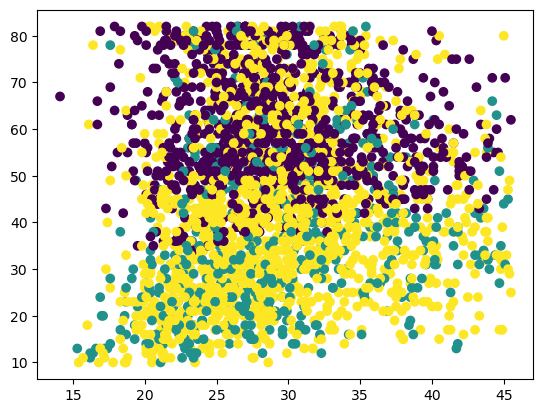

In [139]:
plt.scatter(Stroke_cluster['bmi'], Stroke_cluster['age'], c=Stroke_cluster['label'])

###  KNN Classifier

In [140]:
#Spliting the dataset into train and test 
train, test = train_test_split(stroke_ds, test_size=0.2, random_state=142)
#Printing train and test data size
print('Train data size: ',train.shape)
print('Test data size: ',test.shape)

Train data size:  (2306, 11)
Test data size:  (577, 11)


In [141]:
#Defining input and Output feature
X_train = train.drop(['stroke'], axis = 1)
y_train = train['stroke']

X_test = test.drop(['stroke'], axis = 1)
y_test = test['stroke']

In [142]:
#shape of X_train, y_train, X_test, y_test
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2306, 10), (2306,), (577, 10), (577,))

In [143]:
# Define the model: Init K-NN
knn = KNeighborsClassifier(n_neighbors=3, p=2,metric='euclidean')

In [144]:
# Fit Model
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [145]:
# Predict the test set results
y_pred = knn.predict(X_test)

In [146]:
# Evaluate Model
print('Accuracy_score : ',accuracy_score(y_test, y_pred))
print('f1_score : ',f1_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :\n',cm)

Accuracy_score :  0.9480069324090121
f1_score :  0.0
Confusion Matrix :
 [[547   5]
 [ 25   0]]


### Selecting K value = 5

In [147]:
# Define the model: Init K-NN
knn = KNeighborsClassifier(n_neighbors=5, p=2,metric='euclidean')

In [148]:
# Fit Model
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [149]:
# Predict the test set results
y_pred = knn.predict(X_test)

In [150]:
# Evaluate Model
print('Accuracy_score : ',accuracy_score(y_test, y_pred))
print('f1_score : ',f1_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :\n',cm)

Accuracy_score :  0.9549393414211439
f1_score :  0.0
Confusion Matrix :
 [[551   1]
 [ 25   0]]


### GridSearchCV

In [151]:
#importing KFlod from sklearn
from sklearn.model_selection import cross_val_score, KFold

In [152]:
parameters = {"n_neighbors": range(1, 50)}
cv = KFold(n_splits=10, shuffle=True)
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train, y_train)
GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50), 
                         'cv':cv})

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'cv': KFold(n_splits=10, random_state=None, shuffle=True),
                         'n_neighbors': range(1, 50)})

In [153]:
gridsearch.best_params_

{'n_neighbors': 6}

In [154]:
#determining accuracy score
best_accuracy=gridsearch.best_score_

In [155]:
print('The best value of K: ', gridsearch.best_params_['n_neighbors'])
print('The accuracy is: ', best_accuracy)

The best value of K:  6
The accuracy is:  0.9605384492586226


In KNN classifier model,
when k=3 it gives accuracy of 0.9480069324090121

when k=5 it gives accuracy of 0.9549393414211439

We applied GridSearchCV method to find the best k value and  we found 6

when k-6 it gives accuracy of **0.9605384492586226**

And it is the highest accuracy among built KNN models.

### Gaussian Naive Bayes

#### Spliting test and train data into 20% and 80%

### GNB Model A

In [156]:
#importing library
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB

In [157]:
#split training and testing data
train, test = train_test_split(stroke_ds, test_size=0.2, random_state=142)

In [158]:
#printing training and test data shape
print(train.shape)
print(test.shape)

(2306, 11)
(577, 11)


In [160]:
#Defining input and Output feature
X_train = train.drop(['stroke'], axis = 1)
y_train = train['stroke']

X_test = test.drop(['stroke'], axis = 1)
y_test = test['stroke']

In [161]:
#shape of X_train, y_train, X_test, y_test
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2306, 10), (2306,), (577, 10), (577,))

In [162]:
# Create and training a Gaussian Naive Bayes classifier model
clf = GaussianNB()
clf.fit(X_train, y_train)

# Use the model to predict testing data
y_pred = clf.predict(X_test)
A_accuracy = accuracy_score(y_pred, y_test)
print('Testing accuracy is: %.4f\n' % A_accuracy)

Testing accuracy is: 0.8821



In [163]:
clf.theta_

array([[4.59846501e+01, 8.62302483e-02, 4.42437923e-02, 9.16044560e+01,
        2.92550790e+01, 7.35440181e-01, 1.90293454e+00, 5.11060948e-01,
        9.84650113e-01, 1.19051919e+00],
       [6.70769231e+01, 2.52747253e-01, 1.42857143e-01, 9.60323077e+01,
        2.93208791e+01, 8.68131868e-01, 2.05494505e+00, 4.94505495e-01,
        9.12087912e-01, 6.92307692e-01]])

In [164]:
clf.var_

array([[3.35039043e+02, 7.87951476e-02, 4.22868342e-02, 5.50851532e+02,
        3.61341948e+01, 1.94568476e-01, 8.53332801e-01, 2.49878210e-01,
        4.51232205e-01, 7.91693965e-01],
       [1.75279798e+02, 1.88866634e-01, 1.22449535e-01, 6.38325322e+02,
        2.70537404e+01, 1.14479483e-01, 7.77201376e-01, 2.49970365e-01,
        5.63700591e-01, 8.28402922e-01]])

In [165]:
# Explore the learned probability (model parameters)
print('Estimated probability of classess: \n', clf.class_prior_)
print('Estimated mean for each Gaussian distribution: \n', clf.theta_)
print('Estimated variance for each Gaussian distribution: \n', clf.var_)

Estimated probability of classess: 
 [0.96053773 0.03946227]
Estimated mean for each Gaussian distribution: 
 [[4.59846501e+01 8.62302483e-02 4.42437923e-02 9.16044560e+01
  2.92550790e+01 7.35440181e-01 1.90293454e+00 5.11060948e-01
  9.84650113e-01 1.19051919e+00]
 [6.70769231e+01 2.52747253e-01 1.42857143e-01 9.60323077e+01
  2.93208791e+01 8.68131868e-01 2.05494505e+00 4.94505495e-01
  9.12087912e-01 6.92307692e-01]]
Estimated variance for each Gaussian distribution: 
 [[3.35039043e+02 7.87951476e-02 4.22868342e-02 5.50851532e+02
  3.61341948e+01 1.94568476e-01 8.53332801e-01 2.49878210e-01
  4.51232205e-01 7.91693965e-01]
 [1.75279798e+02 1.88866634e-01 1.22449535e-01 6.38325322e+02
  2.70537404e+01 1.14479483e-01 7.77201376e-01 2.49970365e-01
  5.63700591e-01 8.28402922e-01]]


#### Spliting test and train data into 80% and 20%

### GNB Model B

In [166]:
#split training and testing data
train, test = train_test_split(stroke_ds, test_size=0.8, random_state=142)

In [167]:
#printing training and test data shape
print(train.shape)
print(test.shape)

(576, 11)
(2307, 11)


In [168]:
#Defining input and Output feature
X_train = train.drop(['stroke'], axis = 1)
y_train = train['stroke']

X_test = test.drop(['stroke'], axis = 1)
y_test = test['stroke']

In [169]:
#shape of X_train, y_train, X_test, y_test
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((576, 10), (576,), (2307, 10), (2307,))

In [170]:
# Create and training a Gaussian Naive Bayes classifier model
clf = GaussianNB()
clf.fit(X_train, y_train)

# Use the model to predict testing data
y_pred = clf.predict(X_test)
B_accuracy = accuracy_score(y_pred, y_test)
print('Testing accuracy is: %.4f\n' % B_accuracy)

Testing accuracy is: 0.8912



#### Spliting test and train data into 10% and 90%

### GNB Model C

In [171]:
#split training and testing data
train, test = train_test_split(stroke_ds, test_size=0.1, random_state=142)

In [172]:
#printing training and test data shape
print(train.shape)
print(test.shape)

(2594, 11)
(289, 11)


In [173]:
#Defining input and Output feature
X_train = train.drop(['stroke'], axis = 1)
y_train = train['stroke']

X_test = test.drop(['stroke'], axis = 1)
y_test = test['stroke']

In [174]:
#shape of X_train, y_train, X_test, y_test
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2594, 10), (2594,), (289, 10), (289,))

In [175]:
# Create and training a Gaussian Naive Bayes classifier model
clf = GaussianNB()
clf.fit(X_train, y_train)

# Use the model to predict testing data
y_pred = clf.predict(X_test)
C_accuracy = accuracy_score(y_pred, y_test)
print('Testing accuracy is: %.4f\n' % C_accuracy)

Testing accuracy is: 0.8927



#### Spliting test and train data into 90% and 10%

### GNB Model D

In [176]:
#split training and testing data
train, test = train_test_split(stroke_ds, test_size=0.9, random_state=142)

In [177]:
#printing training and test data shape
print(train.shape)
print(test.shape)

(288, 11)
(2595, 11)


In [178]:
#Defining input and Output feature
X_train = train.drop(['stroke'], axis = 1)
y_train = train['stroke']

X_test = test.drop(['stroke'], axis = 1)
y_test = test['stroke']

In [179]:
#shape of X_train, y_train, X_test, y_test
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((288, 10), (288,), (2595, 10), (2595,))

In [180]:
# Create and training a Gaussian Naive Bayes classifier model
clf = GaussianNB()
clf.fit(X_train, y_train)

# Use the model to predict testing data
y_pred = clf.predict(X_test)
D_accuracy = accuracy_score(y_pred, y_test)
print('Testing accuracy is: %.4f\n' % D_accuracy)

Testing accuracy is: 0.8979



In [181]:
clf.theta_

array([[4.60107914e+01, 6.47482014e-02, 4.31654676e-02, 9.15624101e+01,
        3.00446043e+01, 7.30215827e-01, 1.83812950e+00, 4.92805755e-01,
        9.92805755e-01, 1.23381295e+00],
       [6.53000000e+01, 1.00000000e-01, 1.00000000e-01, 8.89860000e+01,
        3.10400000e+01, 9.00000000e-01, 2.20000000e+00, 5.00000000e-01,
        9.00000000e-01, 8.00000000e-01]])

In [182]:
clf.var_

array([[3.36262474e+02, 6.05564397e-02, 4.13027779e-02, 5.71263292e+02,
        3.78481549e+01, 1.97001241e-01, 9.84589875e-01, 2.49948811e-01,
        4.53186221e-01, 7.76267324e-01],
       [2.34410001e+02, 9.00005678e-02, 9.00005678e-02, 4.66020985e+02,
        3.04904006e+01, 9.00005678e-02, 1.60000568e-01, 2.50000568e-01,
        2.90000568e-01, 9.60000568e-01]])

In [183]:
# Explore the learned probability (model parameters)
print('Estimated probability of classess: \n', clf.class_prior_)
print('Estimated mean for each Gaussian distribution: \n', clf.theta_)
print('Estimated variance for each Gaussian distribution: \n', clf.var_)

Estimated probability of classess: 
 [0.96527778 0.03472222]
Estimated mean for each Gaussian distribution: 
 [[4.60107914e+01 6.47482014e-02 4.31654676e-02 9.15624101e+01
  3.00446043e+01 7.30215827e-01 1.83812950e+00 4.92805755e-01
  9.92805755e-01 1.23381295e+00]
 [6.53000000e+01 1.00000000e-01 1.00000000e-01 8.89860000e+01
  3.10400000e+01 9.00000000e-01 2.20000000e+00 5.00000000e-01
  9.00000000e-01 8.00000000e-01]]
Estimated variance for each Gaussian distribution: 
 [[3.36262474e+02 6.05564397e-02 4.13027779e-02 5.71263292e+02
  3.78481549e+01 1.97001241e-01 9.84589875e-01 2.49948811e-01
  4.53186221e-01 7.76267324e-01]
 [2.34410001e+02 9.00005678e-02 9.00005678e-02 4.66020985e+02
  3.04904006e+01 9.00005678e-02 1.60000568e-01 2.50000568e-01
  2.90000568e-01 9.60000568e-01]]


In [184]:
# initialize data of lists. 
data = {'Model': ['D', 'C', 'B', 'A'], 
        'Accuracy': [D_accuracy, C_accuracy, B_accuracy, A_accuracy]} 
  
# Creates pandas DataFrame. 
df = pd.DataFrame(data, index=['rank1', 
                               'rank2', 
                               'rank3', 
                               'rank4']) 
  
# printing dataframe of 4 Gaussian Naive Bayes classifier model accuracy
df 

,Model,Accuracy
rank1,D,0.897881
rank2,C,0.892734
rank3,B,0.891201
rank4,A,0.882149


From the above table we can say that **Model D** works better than others with accuracy **90.1734%** . Where test data was 90% and train data was 10% of the dataset.

## Comparison of LogisticRegression, KNN, Gaussian Naive Bayes

In [185]:
# initialize data of lists. 
data = {'KNN': [best_accuracy], 
        'GNB': [D_accuracy],
        'Logistic': [accuracy],
        'RFE': [rfe_accuracy]} 
  
# Creates pandas DataFrame. 
df = pd.DataFrame(data) 
  
# printing dataframe
df 

,KNN,GNB,Logistic,RFE
0,0.960538,0.897881,0.956672,0.956672


**Here comparing the accuracy these model we can see that KNN is best for this dataset with maximum accuracy.**